# **POLICE KILLINGS IN THE UNITED STATES 2015-2020**

<a id="top"></a>

<h3 aria-controls="home">Table of Contents</h3>

* [Introduction](#intro)
* [Libraries & Packages](#libraries)
* [Initial Insights](#insights)
* [Missing Values](#missing)
* [Cardinality](#cardinality)
* [Data Preprocessing & Feature Engineering](#preprocessing)
* [Univariate Data Exploration](#univariate)
* [Timewise Data Exploration](#timewise)
* [Bivariate Data Exploration](#bivariate)
* [Conclusion](#conclusion) 

<a id="intro"></a>
## **INTRODUCTION**

Since its inception, police in America have continued to have a tenuous and volatile relationship with many of its citizens, especially those of lower economic status and those whose race is not classified as White. 

In this notebook I will perform a exploratory data analysis on a dataset that consists of people killed by police throughout the United States. 

I hope this notebook provides you with insights and I hope that we can work toward rectifying the racial and economic disparity that continues to fuel police brutality in these United States of America. 

<a id="libraries"></a>
## **LIBRARIES & PACKAGES**

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np 
import pandas as pd 
import os
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import missingno as msno
import plotly.graph_objects as go
import plotly.figure_factory as ff
from plotly.subplots import make_subplots

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/data-police-shootings/fatal-police-shootings-data.csv


In [2]:
df = pd.read_csv('/kaggle/input/data-police-shootings/fatal-police-shootings-data.csv')
df.columns

Index(['id', 'name', 'date', 'manner_of_death', 'armed', 'age', 'gender',
       'race', 'city', 'state', 'signs_of_mental_illness', 'threat_level',
       'flee', 'body_camera'],
      dtype='object')

In [3]:
df.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,2015-01-02,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,2015-01-02,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,2015-01-03,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,2015-01-04,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,2015-01-04,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False


<a id="insights"></a>
## **INITIAL INSIGHTS**

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5416 entries, 0 to 5415
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       5416 non-null   int64  
 1   name                     5416 non-null   object 
 2   date                     5416 non-null   object 
 3   manner_of_death          5416 non-null   object 
 4   armed                    5189 non-null   object 
 5   age                      5181 non-null   float64
 6   gender                   5414 non-null   object 
 7   race                     4895 non-null   object 
 8   city                     5416 non-null   object 
 9   state                    5416 non-null   object 
 10  signs_of_mental_illness  5416 non-null   bool   
 11  threat_level             5416 non-null   object 
 12  flee                     5167 non-null   object 
 13  body_camera              5416 non-null   bool   
dtypes: bool(2), float64(1), 

In [5]:
df.describe(include='all')

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
count,5416.000000,5416,5416,5416,5189,5181.000000,5414,4895,5416,5416,5416,5416,5167,5416
unique,NaN,5206,1844,2,93,NaN,2,6,2470,51,2,3,4,2
top,NaN,TK TK,2018-01-06,shot,gun,NaN,M,W,Los Angeles,CA,False,attack,Not fleeing,False
freq,NaN,187,9,5146,3060,NaN,5176,2476,85,799,4200,3495,3411,4798
mean,3010.398264,NaN,NaN,NaN,NaN,37.117931,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,1695.786456,NaN,NaN,NaN,NaN,13.116135,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,3.000000,NaN,NaN,NaN,NaN,6.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,1545.750000,NaN,NaN,NaN,NaN,27.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,3009.500000,NaN,NaN,NaN,NaN,35.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,4486.250000,NaN,NaN,NaN,NaN,46.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<a id="missing"></a>
## **MISSING VALUES**

In [6]:
missing_values = df.isnull()
missing_values.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [7]:
for column in missing_values.columns.tolist():
    print(column)
    print(missing_values[column].value_counts())
    print('')

id
False    5416
Name: id, dtype: int64

name
False    5416
Name: name, dtype: int64

date
False    5416
Name: date, dtype: int64

manner_of_death
False    5416
Name: manner_of_death, dtype: int64

armed
False    5189
True      227
Name: armed, dtype: int64

age
False    5181
True      235
Name: age, dtype: int64

gender
False    5414
True        2
Name: gender, dtype: int64

race
False    4895
True      521
Name: race, dtype: int64

city
False    5416
Name: city, dtype: int64

state
False    5416
Name: state, dtype: int64

signs_of_mental_illness
False    5416
Name: signs_of_mental_illness, dtype: int64

threat_level
False    5416
Name: threat_level, dtype: int64

flee
False    5167
True      249
Name: flee, dtype: int64

body_camera
False    5416
Name: body_camera, dtype: int64



In [8]:
missing_percentage = (missing_values.sum()*100)/df.shape[0]
missing_percentage

id                         0.000000
name                       0.000000
date                       0.000000
manner_of_death            0.000000
armed                      4.191285
age                        4.338996
gender                     0.036928
race                       9.619645
city                       0.000000
state                      0.000000
signs_of_mental_illness    0.000000
threat_level               0.000000
flee                       4.597489
body_camera                0.000000
dtype: float64

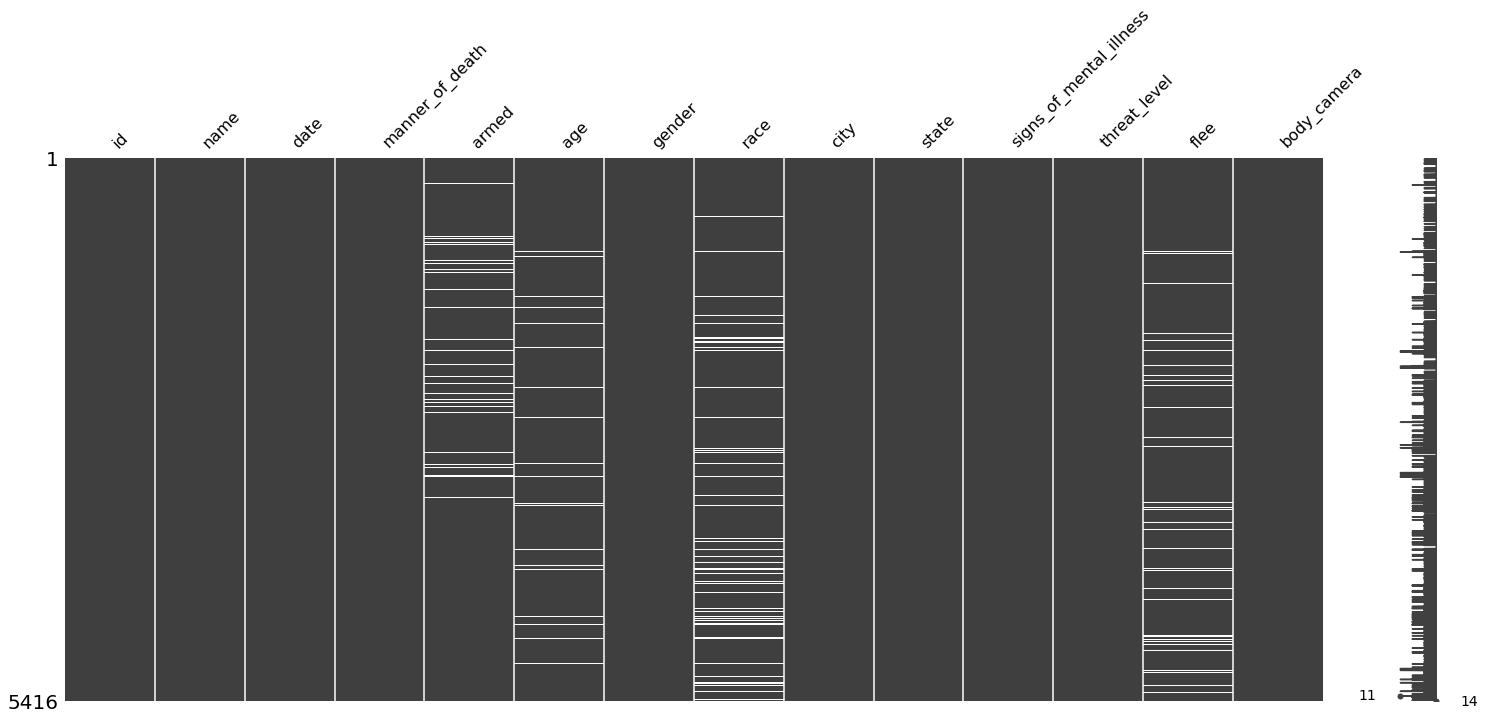

In [9]:
msno.matrix(df)

In [10]:
#DROP NULL VALUES

df.dropna(inplace=True)

<a id="cardinality"></a>
## **CARDINALITY**

In [11]:
cardinality={}
for col in df.columns:
    cardinality[col] = df[col].nunique()

cardinality

{'id': 4399,
 'name': 4377,
 'date': 1733,
 'manner_of_death': 2,
 'armed': 90,
 'age': 75,
 'gender': 2,
 'race': 6,
 'city': 2116,
 'state': 51,
 'signs_of_mental_illness': 2,
 'threat_level': 3,
 'flee': 4,
 'body_camera': 2}

In [12]:
print('MANNER OF DEATH')
print(df['manner_of_death'].unique())
print('-'*40)
print('RACE')
print(df['race'].unique())
print('-'*40)
print('THREAT LEVEL')
print(df['threat_level'].unique())
print('-'*40)
print('FLEE')
print(df['flee'].unique())



MANNER OF DEATH
['shot' 'shot and Tasered']
----------------------------------------
RACE
['A' 'W' 'H' 'B' 'O' 'N']
----------------------------------------
THREAT LEVEL
['attack' 'other' 'undetermined']
----------------------------------------
FLEE
['Not fleeing' 'Car' 'Foot' 'Other']


<a id="preprocessing"></a>
## **DATA PREPROCESSING & FEATURE ENGINEERING**

In [13]:
# SEPARATE DAY, MONTH, YEAR INTO INDIVIDUAL COLUMNS
df['date']=pd.to_datetime(df['date'])
df['year']=pd.to_datetime(df['date']).dt.year
df['month']=pd.to_datetime(df['date']).dt.month
df['month_name']=df['date'].dt.strftime('%B')
df['month_num']=df['date'].dt.strftime('%m')
df['weekday']=df['date'].dt.strftime('%A')  
df['date_num']=df['date'].dt.strftime('%d').astype(int)
df['year_month']=df.date.dt.to_period("M")

# CLASSIFY VICTIM AGES INTO AGE RANGE GROUPS
df['age_range']=np.where(df['age']<18,'<18',np.where((df['age']>=18)&(df['age']<=35),'18-35',
np.where((df['age']>=36)&(df['age']<=50),'36-50',np.where(df['age']>65,'65+',
np.where((df['age']>=51)&(df['age']<=65),'51-65',"Not Specified")))))

# CHANGE ORDER OF COLUMNS
cols = ['id', 'name', 'age', 'age_range', 'gender', 'race', 'manner_of_death', 'armed', 'flee', 
        'signs_of_mental_illness', 'threat_level', 'body_camera', 'city', 'state',
        'date', 'date_num', 'year', 'year_month', 'month', 'month_name', 'month_num', 'weekday']
df=df[cols]
df.head(3)

,id,name,age,age_range,gender,race,manner_of_death,armed,flee,signs_of_mental_illness,...,city,state,date,date_num,year,year_month,month,month_name,month_num,weekday
0,3,Tim Elliot,53.0,51-65,M,A,shot,gun,Not fleeing,True,...,Shelton,WA,2015-01-02,2,2015,2015-01,1,January,01,Friday
1,4,Lewis Lee Lembke,47.0,36-50,M,W,shot,gun,Not fleeing,False,...,Aloha,OR,2015-01-02,2,2015,2015-01,1,January,01,Friday
2,5,John Paul Quintero,23.0,18-35,M,H,shot and Tasered,unarmed,Not fleeing,False,...,Wichita,KS,2015-01-03,3,2015,2015-01,1,January,01,Saturday


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4399 entries, 0 to 5413
Data columns (total 22 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   id                       4399 non-null   int64         
 1   name                     4399 non-null   object        
 2   age                      4399 non-null   float64       
 3   age_range                4399 non-null   object        
 4   gender                   4399 non-null   object        
 5   race                     4399 non-null   object        
 6   manner_of_death          4399 non-null   object        
 7   armed                    4399 non-null   object        
 8   flee                     4399 non-null   object        
 9   signs_of_mental_illness  4399 non-null   bool          
 10  threat_level             4399 non-null   object        
 11  body_camera              4399 non-null   bool          
 12  city                     4399 non-

<a id="univariate"></a>
## **UNIVARIATE DATA EXPLORATION & VISUALIZATION**

Create visualizations for numeric and categorical data  
Preliminary analysis of variable correlation

### **AGE AND AGE RANGES**

In [15]:
fig = ff.create_distplot([df['age']], ['age'], bin_size=5, colors=['blue'])
fig.update_layout(title_text="Distribution of Age", title_x=0.5)
fig.show()

In [16]:
fig = px.pie(df, values='age', names='age_range')
fig.update_layout(title_text="Distribution of Age Ranges", title_x=0.5)
fig.show()


In [17]:
fig = px.histogram(df, x='gender', color='gender')
fig.update_layout(title_text='Value Count of Gender', title_x=0.5)
fig.show()

In [18]:
fig = px.histogram(df, x=df['race'], color='race')
fig.update_layout(title_text='Distribution of Race', title_x=0.5)
fig.show()

In [19]:
fig = px.histogram(df, x='manner_of_death', color='manner_of_death')
fig.update_layout(title_text='Manner of Death', title_x=0.5)
fig.show()

In [20]:
top_armed = df['armed'].value_counts().to_frame()
top_armed.reset_index(inplace=True)
top_armed = top_armed.rename(columns={'index':'armed', 'armed':'count'})

fig = px.histogram(top_armed[0:15], x='armed', y='count', color='armed')

fig.update_layout(title_text='Weapon of Victim', title_x=0.5)
fig.show()

In [21]:
fig = px.histogram(df, x='flee', color='flee')
fig.update_layout(title_text='Was Victim Fleeing?', title_x=0.5)
fig.show()

In [22]:
mental_illness = df['signs_of_mental_illness'].value_counts().to_frame().reset_index().rename(columns={'index':'mental_illness','signs_of_mental_illness':'count'})

fig = px.histogram(df, x='signs_of_mental_illness', color='signs_of_mental_illness')

fig.update_layout(title_text='Signs of Mental Illness', title_x=0.5)
fig.show()

In [23]:
#THREAT LEVEL
fig = px.histogram(df, x='threat_level', color='threat_level')
fig.update_layout(title_text='Threat Level of Victim', title_x=0.5)
fig.show()

In [24]:
#BODY CAMERA
fig = px.histogram(df, x='body_camera', color='body_camera')
fig.update_layout(title_text="Was Officer's Body Camera On?", title_x=0.5)
fig.show()

In [25]:
#STATE WHERE SHOOTINGS TOOK PLACE
states = df['state'].value_counts().to_frame().reset_index()
states.rename(columns={'index':'state', 'state':'count'}, inplace=True)
# states = states.sort_values(by='count', ascending=False)
states


fig = go.Figure(go.Bar(y=states['state'].sort_index(ascending=False), 
                       x=states['count'].sort_index(ascending=False),
                       orientation='h', text=states['count'].sort_index(ascending=False),
                       textposition='outside', marker_color=states['count'].sort_index(ascending=False)))


fig.update_xaxes(showline=True, linewidth=2, linecolor='black', mirror=True)
fig.update_yaxes(showline=True, linewidth=2, linecolor='black', mirror=True)
fig.update_layout(title_text='Police Killings, Organized by States',yaxis_title='States',
                 xaxis_title='Total number of victims', title_x=0.5, height=1000)

fig.show()

<a id="timewise"></a>
## **TIMEWISE DATA EXPLORATION**

### **POLICE KILLINGS BY YEAR**

In [26]:
df_years = df['year'].value_counts().to_frame().reset_index()
df_years.rename(columns={'index':'year', 'year':'count'}, inplace=True)
df_years = df_years.sort_values(by='year')
df_years

,year,count
0,2015,895
1,2016,820
3,2017,784
2,2018,800
4,2019,764
5,2020,336


In [27]:
fig = go.Figure()

fig.add_trace(go.Scatter(x=df_years['year'], y=df_years['count'],
                mode='lines+markers',
                marker_color="red"))

fig.update_layout(title_text='Police Killings by Year',xaxis_title='Years',
                 yaxis_title='Total number of kills', title_x=0.5)

fig.show()


### **MONTHLY DEATHS BY YEAR**

Let's visualize how many police killings occurred each month from 2015 to 2020

In [28]:
df_monthly = df['date'].groupby(df.date.dt.to_period("M")).agg('count').to_frame(name="count").reset_index()
df_monthly = df_monthly.sort_values(by='date')

year_month=[]
for i in df_monthly['date']:
    year_month.append(str(i))
    
df_monthly.head()

,date,count
0,2015-01,68
1,2015-02,73
2,2015-03,84
3,2015-04,80
4,2015-05,65


In [29]:
fig = make_subplots(rows=2, cols=1, subplot_titles=("Monthly series", "Distribution of monthly count"))

fig.add_trace(go.Scatter(x=year_month, y=df_monthly['count'], 
                         name="Monthly Deaths", mode='lines+markers'),row=1,col=1)

fig.add_trace(go.Box(y=df_monthly['count'], name='Count',
                marker_color = 'indianred',boxmean='sd'),row=2,col=1)

fig.update_xaxes(title_text="Year", row=1, col=1,showline=True, linewidth=2, linecolor='black', mirror=True)
fig.update_xaxes(title_text=" ", row=2, col=1,showline=True, linewidth=2, linecolor='black', mirror=True)
fig.update_yaxes(title_text="Number of Victims", row=1, col=1,showline=True, linewidth=2, linecolor='black', mirror=True)
fig.update_yaxes(title_text="Number of Victims", row=2, col=1,showline=True, linewidth=2, linecolor='black', mirror=True)

fig.update_layout(title_text='Fatal Killing Monthly Count 2015 - 2020', title_x=0.5,showlegend=False,height=1000)
fig.show()

### **MONTHLY DEATHS ORGANIZED BY YEAR**
For a better comparison, let's visualize the number of killings each month for every year. 

In [30]:
df.head(1)

,id,name,age,age_range,gender,race,manner_of_death,armed,flee,signs_of_mental_illness,...,city,state,date,date_num,year,year_month,month,month_name,month_num,weekday
0,3,Tim Elliot,53.0,51-65,M,A,shot,gun,Not fleeing,True,...,Shelton,WA,2015-01-02,2,2015,2015-01,1,January,01,Friday


In [31]:
df_monthly['year'] = df_monthly['date'].dt.strftime('%Y')

def plot_month(year, color):
    temp_month = []
    for i in df_monthly.loc[df_monthly['year']==year]['date']:
        temp_month.append(str(i))
    trace=go.Bar(x=temp_month, y=df_monthly.loc[df_monthly['year']==year]['count'], 
                 name=year, marker_color=color)
    return trace

In [32]:
fig = make_subplots(rows=3, cols=2, subplot_titles=('2015', '2016', '2017', '2018', '2019', '2020'))

fig.add_trace(plot_month('2015', 'blue'), row=1, col=1)
fig.add_trace(plot_month('2016', 'red'), row=1, col=2)
fig.add_trace(plot_month('2017', 'green'), row=2, col=1)
fig.add_trace(plot_month('2018', 'orange'), row=2, col=2)
fig.add_trace(plot_month('2019', 'purple'), row=3, col=1)
fig.add_trace(plot_month('2020', 'teal'), row=3, col=2)

fig.update_xaxes(showline=True, linewidth=2, linecolor='black', mirror=True)
fig.update_yaxes(showline=True, linewidth=2, linecolor='black', mirror=True)
fig.update_layout(title_text='Distribution of Monthly Killings by Year', title_x=0.5, showlegend=False)
fig.show()

### **MONTHS WITH THE MOST KILLINGS**

In [33]:
only_month = df.groupby(['month_name','month'])[['month_name']].agg('count')
only_month.rename(columns={'month_name':'count'}, inplace=True)
only_month.reset_index(inplace=True)
only_month.sort_values(by='month', inplace=True)
only_month

,month_name,month,count
4,January,1,465
3,February,2,419
7,March,3,446
0,April,4,382
8,May,5,378
6,June,6,350
5,July,7,379
1,August,8,344
11,September,9,303
10,October,10,335


In [34]:
fig = go.Figure(data=[go.Bar(x=only_month['month_name'], y=only_month['count'], 
                             name='Months', marker_color='blue')])

fig.update_xaxes(showline=True, linewidth=1, linecolor='black', mirror=True)
fig.update_yaxes(showline=True, linewidth=1, linecolor='black', mirror=True)
fig.update_layout(title_text='Deaths - All Months',xaxis_title='Months',
                 yaxis_title='Total number of kills', title_x=0.5,barmode='stack')

fig.show()

### **YEARS WITH MOST KILLINGS**

In [35]:
year_count = df.groupby(['year'])[['id']].agg('count')
year_count.reset_index(inplace=True)
year_count.rename(columns={'id':'count'}, inplace=True)
year_count.head()

,year,count
0,2015,895
1,2016,820
2,2017,784
3,2018,800
4,2019,764


In [36]:
fig = go.Figure(data=[go.Bar(x=year_count['year'], y=year_count['count'], 
                             name='Months', marker_color='blue')])

fig.update_xaxes(showline=True, linewidth=1, linecolor='black', mirror=True)
fig.update_yaxes(showline=True, linewidth=1, linecolor='black', mirror=True)
fig.update_layout(title_text='Deaths - All Years',xaxis_title='Months',
                 yaxis_title='Total number of kills', title_x=0.5,barmode='stack')
fig.show()

### **MOST KILLINGS BY DAY**

In [37]:
df.head(1)

,id,name,age,age_range,gender,race,manner_of_death,armed,flee,signs_of_mental_illness,...,city,state,date,date_num,year,year_month,month,month_name,month_num,weekday
0,3,Tim Elliot,53.0,51-65,M,A,shot,gun,Not fleeing,True,...,Shelton,WA,2015-01-02,2,2015,2015-01,1,January,01,Friday


In [38]:
weekday_count = df.groupby(['weekday'])[['id']].agg('count')
weekday_count = weekday_count.reindex(['Sunday','Monday','Tuesday','Wednesday','Thursday','Friday','Saturday'])
weekday_count.reset_index(inplace=True)
weekday_count.rename(columns={'id':'count'}, inplace=True)
weekday_count.head(7)


,weekday,count
0,Sunday,619
1,Monday,610
2,Tuesday,657
3,Wednesday,673
4,Thursday,657
5,Friday,597
6,Saturday,586


In [39]:
fig = go.Figure(data=[go.Bar(x=weekday_count['weekday'], y=weekday_count['count'],
                            name='Weekdays', marker_color='blue')])

fig.update_xaxes(showline=True, linewidth=1, linecolor='black', mirror=True)
fig.update_yaxes(showline=True, linewidth=1, linecolor='black', mirror=True)
fig.update_layout(title_text='Deaths - Days of the Week',xaxis_title='Weekdays',
                 yaxis_title='Total number of kills', title_x=0.5,barmode='stack')
fig.show()

<a id="bivariate"></a>
## **BIVARIATE DATA EXPLORATION & VISUALIZATION**

### **BODY CAMERA & FLEE**


In [40]:
pd.pivot_table(df, index = 'body_camera', columns = 'flee', values = 'id',aggfunc ='count')

flee,Car,Foot,Not fleeing,Other
body_camera,,,,
False,598,534,2609,128
True,59,96,356,19


### **RACE AND AGE GROUP**

In [41]:
df.head(1)

,id,name,age,age_range,gender,race,manner_of_death,armed,flee,signs_of_mental_illness,...,city,state,date,date_num,year,year_month,month,month_name,month_num,weekday
0,3,Tim Elliot,53.0,51-65,M,A,shot,gun,Not fleeing,True,...,Shelton,WA,2015-01-02,2,2015,2015-01,1,January,01,Friday


In [42]:
pd.pivot_table(df, index = 'race', columns = 'age_range', values = 'id',aggfunc ='count')

age_range,18-35,36-50,51-65,65+,<18
race,,,,,
A,40.0,26.0,14.0,NaN,3.0
B,747.0,290.0,75.0,16.0,36.0
H,467.0,243.0,51.0,6.0,19.0
N,47.0,19.0,3.0,NaN,1.0
O,28.0,11.0,4.0,NaN,NaN
W,938.0,771.0,432.0,83.0,29.0


In [43]:
df_race_age = df.groupby(['race', 'age_range']).agg('count')['id'].to_frame('count').reset_index()
df_black = df_race_age.loc[df_race_age['race'] == 'B']
df_white = df_race_age.loc[df_race_age['race'] == 'W']
df_hispanic = df_race_age.loc[df_race_age['race'] == 'H']
df_native = df_race_age.loc[df_race_age['race'] == 'N']
df_asian = df_race_age.loc[df_race_age['race'] == 'A']
df_other = df_race_age.loc[df_race_age['race'] == 'O']

In [44]:
black = go.Bar(x = df_black['age_range'], y = df_black['count'], 
             marker=dict(color='black'),name="black")
white = go.Bar(x=df_white['age_range'],y=df_white['count'],
               marker=dict(color='pink'),name="white")
hispanic = go.Bar(x=df_hispanic['age_range'],y=df_hispanic['count'],
               marker=dict(color='tan'),name="hispanic")
asian = go.Bar(x=df_asian['age_range'],y=df_asian['count'],
               marker=dict(color='yellow'),name="asian")
native = go.Bar(x=df_native['age_range'],y=df_native['count'],
               marker=dict(color='red'),name="native")
other = go.Bar(x=df_other['age_range'],y=df_other['count'],
               marker=dict(color='teal'),name="other")

data=[white,black,hispanic,asian,native,other]

fig = go.Figure(data)
fig.update_xaxes(showline=True, linewidth=2, linecolor='black', mirror=True)
fig.update_yaxes(showline=True, linewidth=2, linecolor='black', mirror=True)
fig.update_layout(title="Death Toll - Race & Age Range",title_x=0.5,xaxis=dict(title="Year"),yaxis=dict(title="Number of Victims"),
                   barmode="group")
fig.show()

### **RACE & GENDER**

In [45]:
df_race_gender = df.groupby(['race', 'gender']).agg('count')['id'].to_frame('count').reset_index()

df_black_gender = df_race_gender.loc[df_race_gender['race'] == 'B']
df_black_gender = df_black_gender.sort_values(by='count', ascending=False)

df_white_gender = df_race_gender.loc[df_race_gender['race'] == 'W']
df_white_gender = df_white_gender.sort_values(by='count', ascending=False)

df_hispanic_gender = df_race_gender.loc[df_race_gender['race'] == 'H']
df_hispanic_gender = df_hispanic_gender.sort_values(by='count', ascending=False)

df_asian_gender = df_race_gender.loc[df_race_gender['race'] == 'A']
df_asian_gender = df_asian_gender.sort_values(by='count', ascending=False)

df_native_gender = df_race_gender.loc[df_race_gender['race'] == 'N']
df_native_gender = df_native_gender.sort_values(by='count', ascending=False)

df_other_gender = df_race_gender.loc[df_race_gender['race'] == 'O']
df_other_gender = df_other_gender.sort_values(by='count', ascending=False)




In [46]:
black = go.Bar(x=df_black_gender['gender'], y=df_black_gender['count'], 
              marker=dict(color='black'),name="black", 
              text=df_black_gender['count'], textposition='outside')

white = go.Bar(x=df_white_gender['gender'], y=df_white_gender['count'], 
              marker=dict(color='pink'),name="white",
              text=df_white_gender['count'], textposition='outside')

hispanic = go.Bar(x=df_hispanic_gender['gender'], y=df_hispanic_gender['count'], 
              marker=dict(color='tan'),name="hispanic",
            text=df_hispanic_gender['count'], textposition='outside')

asian = go.Bar(x=df_asian_gender['gender'], y=df_asian_gender['count'], 
              marker=dict(color='yellow'),name="asian",
              text=df_asian_gender['count'], textposition='outside')

native = go.Bar(x=df_native_gender['gender'], y=df_native_gender['count'], 
              marker=dict(color='red'),name="native",
               text=df_native_gender['count'], textposition='outside')

other = go.Bar(x=df_other_gender['gender'], y=df_other_gender['count'], 
              marker=dict(color='teal'),name="other",
              text=df_other_gender['count'], textposition='outside')

data=[white,black,hispanic,asian,native,other]

fig = go.Figure(data)
fig.update_xaxes(showline=True, linewidth=2, linecolor='black', mirror=True)
fig.update_yaxes(showline=True, linewidth=2, linecolor='black', mirror=True)
fig.update_layout(title="Death Toll - Race & Gender",title_x=0.5,xaxis=dict(title="Year"),yaxis=dict(title="Number of Victims"),
                   barmode="group")
fig.show()



### **RACE & LOCATION**

In [47]:
df_race_loc = df.groupby(['race','state']).agg('count')['id'].to_frame('count').reset_index()
df_race_loc = df_race_loc.sort_values(by='state').reset_index()
df_race_loc

,index,race,state,count
0,0,A,AK,1
1,146,W,AK,20
2,111,N,AK,9
3,28,B,AK,3
4,147,W,AL,56
...,...,...,...,...
191,194,W,WV,29
192,72,B,WV,7
193,131,N,WY,2
194,110,H,WY,2


### **RACE AND MENTAL ILLNESS**

In [48]:
race_mental = df.groupby(['race','signs_of_mental_illness']).agg('count')['id'].to_frame('count').reset_index()

black_mental = race_mental.loc[race_mental['race'] == 'B']
black_mental = black_mental.sort_values(by='count', ascending=False)

white_mental = race_mental.loc[race_mental['race'] == 'W']
white_mental = white_mental.sort_values(by='count', ascending=False)

hispanic_mental = race_mental.loc[race_mental['race'] == 'H']
hispanic_mental = hispanic_mental.sort_values(by='count', ascending=False)

asian_mental = race_mental.loc[race_mental['race'] == 'A']
asian_mental = asian_mental.sort_values(by='count', ascending=False)

native_mental = race_mental.loc[race_mental['race'] == 'N']
native_mental = native_mental.sort_values(by='count', ascending=False)

other_mental = race_mental.loc[race_mental['race'] == 'O']
other_mental = other_mental.sort_values(by='count', ascending=False)

In [49]:
black = go.Bar(x=black_mental['signs_of_mental_illness'], y=black_mental['count'],
              marker=dict(color='black'),name="black")
white = go.Bar(x=white_mental['signs_of_mental_illness'], y=white_mental['count'],
              marker=dict(color='pink'),name="white")
hispanic = go.Bar(x=hispanic_mental['signs_of_mental_illness'], y=hispanic_mental['count'],
              marker=dict(color='tan'),name="hispanic")
asian = go.Bar(x=asian_mental['signs_of_mental_illness'], y=asian_mental['count'],
              marker=dict(color='yellow'),name="asian")
native = go.Bar(x=native_mental['signs_of_mental_illness'], y=native_mental['count'],
              marker=dict(color='red'),name="native")
other = go.Bar(x=other_mental['signs_of_mental_illness'], y=other_mental['count'],
              marker=dict(color='teal'),name="other")

data = [white,black,hispanic,asian,native,other]

fig = go.Figure(data)
fig.update_xaxes(showline=True, linewidth=2, linecolor='black', mirror=True)
fig.update_yaxes(showline=True, linewidth=2, linecolor='black', mirror=True)
fig.update_layout(title="Death Toll - Race & Mental Illness", title_x=0.5,
                  xaxis=dict(title="Signs of Mental Illness"),
                  yaxis=dict(title="Number of Victims"),
                   barmode="group")
fig.show()

### **RACE & THREAT LEVEL**

In [50]:
race_threat = df.groupby(['race','threat_level','flee']).agg('count')['id'].to_frame('count').reset_index()

black_threat = race_threat.loc[race_threat['race'] == 'B']
black_threat = black_threat.sort_values(by='count', ascending=False)

white_threat = race_threat.loc[race_threat['race'] == 'W']
white_threat = white_threat.sort_values(by='count', ascending=False)

hispanic_threat = race_threat.loc[race_threat['race'] == 'H']
hispanic_threat = hispanic_threat.sort_values(by='count', ascending=False)

asian_threat = race_threat.loc[race_threat['race'] == 'A']
asian_threat = asian_threat.sort_values(by='count', ascending=False)

native_threat = race_threat.loc[race_threat['race'] == 'N']
native_threat = native_threat.sort_values(by='count', ascending=False)

other_threat = race_threat.loc[race_threat['race'] == 'O']
other_threat = other_threat.sort_values(by='count', ascending=False)

In [51]:
black = go.Bar(x=black_threat['threat_level'], y=black_threat['count'],
              marker=dict(color='black'),name="black")
white = go.Bar(x=white_threat['threat_level'], y=white_threat['count'],
              marker=dict(color='pink'),name="white")
hispanic = go.Bar(x=hispanic_threat['threat_level'], y=hispanic_threat['count'],
              marker=dict(color='tan'),name="hispanic")
asian = go.Bar(x=asian_threat['threat_level'], y=asian_threat['count'],
              marker=dict(color='yellow'),name="asian")
native = go.Bar(x=native_threat['threat_level'], y=native_threat['count'],
              marker=dict(color='red'),name="native")
other = go.Bar(x=other_threat['threat_level'], y=other_threat['count'],
              marker=dict(color='teal'),name="other")

data = [white, black, hispanic, asian, native, other]

fig = go.Figure(data)
fig.update_xaxes(showline=True, linewidth=2, linecolor='black', mirror=True)
fig.update_yaxes(showline=True, linewidth=2, linecolor='black', mirror=True)
fig.update_layout(title="Death Toll - Race & Threat Level",title_x=0.5,
                  xaxis=dict(title="Threat Level"),
                  yaxis=dict(title="Number of Victims"),
                   barmode="group")
fig.show()

<a id="conclusion"></a>
## **CONCLUSION**

The above analysis is far from complete as there are many other aspects of the data to explore. I will continue to revisit the data and create new visualizations to gain further insight into the data.

Because population data is not included in the data set, there are questions that are unable to be answered such as the rate of police killings based on the population of each race in the various cities and states throughout the country. Perhaps including census population data is an area that I will explore further in the future. 

It would also be very interesting to have knowledge of the economic status of each of the victims, although that is far outside the scope of this dataset. 

Thanks for stopping by!